In [2]:
import torch
import torch.nn as nn

#假设我们输入的是3通道，32*32的图
class ls_CNN(nn.Module):
    def __init__(self):
        super(ls_CNN,self).__init__()
        layer1=nn.Sequential()
        layer1.add_module('conv1',nn.Conv2d(3,32,3,1,padding=1))
        #第一个参数是in_channels，对应的是输入数据体的深度【3】
        #第二个参数是out_channels，对应的是输出的深度（也就是有几个滤波器）【32】
        #第三个参数是kernel_size，也就是滤波器（卷积核）的大小
        #可以是kernel_size=3,也可以是kernel_size=(3,2)
        #第四个参数是stride。对应的是步长
        #padding表示四周进行多少个像素点的0填充
        #bias=True/False，表示是否使用偏置
        
        #这里就是说我这一层卷积层有32层，每个过滤器是3*3的
        #通过卷积层的是32成，每层32*32
        
        #同时这里我使用了add_module函数，这和layer1.conv1=nn.Conv2d(3,32,3,1,padding=1)是一样的
        
        layer1.add_module('relu',nn.ReLU(True))
        
        layer1.add_module('pool1',nn.MaxPool2d(2,2))
        #主要参数就是kernel_size和stride
        #通过池化层后，是32层，每一层16*16
        
        self.layer1=layer1




        
        layer2=nn.Sequential()
        layer2.add_module('conv2',nn.Conv2d(32,64,3,1,padding=1))
        #出来的就是64层，每一层16*16       
        layer2.add_module('relu2',nn.ReLU(True))
        layer2.add_module('pool2',nn.MaxPool2d(2,2))
        #出来的就是64层，每一层8*8
        self.layer2=layer2



        layer3=nn.Sequential()
        layer3.add_module('conv3',nn.Conv2d(64,128,3,1,padding=1))
        #出来的就是128层，每一层8*8
        layer3.add_module('relu3',nn.ReLU(True))
        layer3.add_module('pool3',nn.MaxPool2d(2,2))
        #出来的就是128层，每一层4*4
        self.layer3=layer3

        #全连接层
        layer4=nn.Sequential()
        layer4.add_module('forward1',nn.Linear(128*4*4,512))
        layer4.add_module('relu4',nn.ReLU(True))
        layer4.add_module('forward2',nn.Linear(512,64))
        layer4.add_module('relu5',nn.ReLU(True))
        layer4.add_module('forward3',nn.Linear(64,10))
        self.layer4=layer4

    def forward(self, x):
        x=self.layer1(x)
        x=self.layer2(x)
        x=self.layer3(x)
        x=x.view(x.size(0),-1) #展开成（batch_num，128*4*4）
        x=self.layer4(x)
        return x


net1=ls_CNN()
print(net1)

ls_CNN(
  (layer1): Sequential(
    (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): ReLU(inplace)
    (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu2): ReLU(inplace)
    (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu3): ReLU(inplace)
    (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer4): Sequential(
    (forward1): Linear(in_features=2048, out_features=512, bias=True)
    (relu4): ReLU(inplace)
    (forward2): Linear(in_features=512, out_features=64, bias=True)
    (relu5): ReLU(inplace)
    (forward3): Linear(in_features=64, out_features=10, bias=True)
  )
)


# 提取层结构（只希望提取网络中的某几层）



nn.Module的几个属性：
    children()——返回下一集模块的迭代器

In [3]:
net2=nn.Sequential(*list(net1.children())[:3])
print(net2)

Sequential(
  (0): Sequential(
    (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): ReLU(inplace)
    (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (1): Sequential(
    (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu2): ReLU(inplace)
    (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (2): Sequential(
    (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu3): ReLU(inplace)
    (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
)


In [4]:
net3=nn.Sequential(*list(net1.children())[0],*list(net1.children())[2])
print(net3)

Sequential(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU(inplace)
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


# 提取结构的参数并自定义初始化

有的时候不仅需要提取出层结构，还要对里面的参数进行初始化

nn.Module里面有两个关于参数的属性
    named_parameters()和parameters()
    第一个给出网络层的名字和参数的迭代器
    第二个给出一个网络中所有参数的迭代器

In [5]:
print(list(net1.parameters()))

[Parameter containing:
tensor([[[[-0.1757,  0.0547, -0.0347],
          [ 0.0183, -0.0352,  0.0647],
          [-0.0585,  0.0212, -0.0075]],

         [[ 0.1533, -0.0235, -0.0008],
          [-0.1737, -0.1084, -0.1031],
          [ 0.1778,  0.1892, -0.0643]],

         [[ 0.1253, -0.0421,  0.0951],
          [ 0.1849, -0.1166,  0.0978],
          [-0.0027, -0.0887,  0.0735]]],


        [[[-0.0633,  0.0907, -0.1315],
          [ 0.1375,  0.0826,  0.0189],
          [ 0.1188, -0.1405, -0.0799]],

         [[ 0.1481,  0.1650,  0.0292],
          [-0.1284,  0.0767, -0.0685],
          [-0.1674,  0.0446,  0.1095]],

         [[ 0.0842,  0.0721,  0.1786],
          [-0.1323, -0.1316,  0.0412],
          [ 0.0207, -0.0222,  0.0028]]],


        [[[-0.0473, -0.0475, -0.1384],
          [-0.1238, -0.0903,  0.1104],
          [-0.0587, -0.1451, -0.1687]],

         [[ 0.0776,  0.1084, -0.0448],
          [-0.0865, -0.0798,  0.1819],
          [-0.0662, -0.1784,  0.0307]],

         [[ 0.0438, -

In [6]:
print(list(net1.named_parameters()))

[('layer1.conv1.weight', Parameter containing:
tensor([[[[-0.1757,  0.0547, -0.0347],
          [ 0.0183, -0.0352,  0.0647],
          [-0.0585,  0.0212, -0.0075]],

         [[ 0.1533, -0.0235, -0.0008],
          [-0.1737, -0.1084, -0.1031],
          [ 0.1778,  0.1892, -0.0643]],

         [[ 0.1253, -0.0421,  0.0951],
          [ 0.1849, -0.1166,  0.0978],
          [-0.0027, -0.0887,  0.0735]]],


        [[[-0.0633,  0.0907, -0.1315],
          [ 0.1375,  0.0826,  0.0189],
          [ 0.1188, -0.1405, -0.0799]],

         [[ 0.1481,  0.1650,  0.0292],
          [-0.1284,  0.0767, -0.0685],
          [-0.1674,  0.0446,  0.1095]],

         [[ 0.0842,  0.0721,  0.1786],
          [-0.1323, -0.1316,  0.0412],
          [ 0.0207, -0.0222,  0.0028]]],


        [[[-0.0473, -0.0475, -0.1384],
          [-0.1238, -0.0903,  0.1104],
          [-0.0587, -0.1451, -0.1687]],

         [[ 0.0776,  0.1084, -0.0448],
          [-0.0865, -0.0798,  0.1819],
          [-0.0662, -0.1784,  0.0307]]

In [7]:
for name in net1.named_parameters():
    print(name[0])
#得到每一层参数的名字

layer1.conv1.weight
layer1.conv1.bias
layer2.conv2.weight
layer2.conv2.bias
layer3.conv3.weight
layer3.conv3.bias
layer4.forward1.weight
layer4.forward1.bias
layer4.forward2.weight
layer4.forward2.bias
layer4.forward3.weight
layer4.forward3.bias


In [8]:
for m in net1.modules():
    if isinstance(m,nn.Conv2d):
        nn.init.kaiming_normal_(m.weight.data)
        nn.init.uniform_(m.bias.data)
    elif isinstance(m,nn.Linear):
        nn.init.normal_(m.weight.data)
        nn.init.uniform_(m.bias.data)
print(list(net1.named_parameters()))        
            

[('layer1.conv1.weight', Parameter containing:
tensor([[[[-4.6758e-01, -5.3116e-01, -3.3547e-01],
          [-1.9656e-01, -4.8637e-01,  3.4152e-01],
          [-1.8233e-01, -4.5427e-01, -1.9615e-01]],

         [[ 1.0973e-02, -1.2649e-01, -1.2893e-01],
          [ 2.1743e-01,  1.2945e-01, -5.2791e-01],
          [-2.6587e-01,  4.4525e-01,  1.4786e-01]],

         [[ 7.5535e-02, -5.4240e-02,  1.3261e-01],
          [ 6.5066e-02,  3.8214e-02,  6.6416e-02],
          [ 1.3650e-02, -7.7683e-03, -5.9459e-01]]],


        [[[ 2.4097e-01,  1.3704e-01, -1.2601e-01],
          [ 1.3821e-01, -8.1604e-02,  1.0477e-01],
          [-2.2603e-01,  1.0894e-01,  2.5413e-01]],

         [[-8.0150e-02, -4.8023e-01, -3.3345e-01],
          [-3.1600e-01,  1.9208e-01,  3.6463e-01],
          [-1.2992e-01,  4.9690e-01, -7.1733e-01]],

         [[-1.2368e-01,  4.9638e-01,  2.5040e-02],
          [ 4.1888e-02, -1.9262e-01,  7.4621e-01],
          [-2.3004e-01,  7.0533e-02,  1.4361e-01]]],


        [[[ 3.0714e

# 经典卷积神经网络

# LeNet
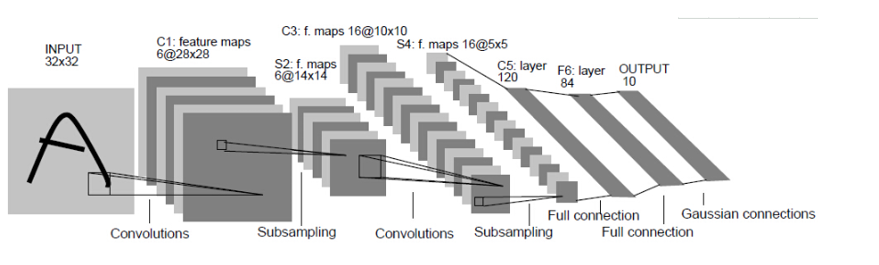

In [9]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet,self).__init__()
        
        layer1=nn.Sequential()
        layer1.add_module('conv1',nn.Conv2d(1,6,3))
        #输入的深度为1
        #第一层卷积层一共6个过滤器，每个过滤器的感受野3*3
        layer1.add_module('pool1',nn.MaxPool2d(2,2))
        self.layer1=layer1
        
        layer2=nn.Sequential()
        layer2.add_module('conv2',nn.Conv2d(6,16,5))
        #第二层卷积层的深度是6
        #第二层卷积层有16个过滤器，每个过滤器的感受野是5，没有填充（所以过了这一层卷积层后size就变小了）
        layer2.add_module('pool2',nn.MaxPool2d(2,2))
        self.layer2=layer2
        
        layer3=nn.Sequential()
        layer3.add_module('forward1',nn.Linear(16*5*5,120))
        layer3.add_module('forward2',nn.Linear(120,84))
        layer3.add_module('forward3',nn.Linear(84,10))
        self.layer3=layer3
        
    def forward(self,x):
        x=self.layer1(x)
        x=self.layer2(x)
        x=x.view(x.size(0),-1)
        x=self.layer3(x)
        return x
lenet=LeNet()
print(lenet)
        

LeNet(
  (layer1): Sequential(
    (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
    (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (forward1): Linear(in_features=400, out_features=120, bias=True)
    (forward2): Linear(in_features=120, out_features=84, bias=True)
    (forward3): Linear(in_features=84, out_features=10, bias=True)
  )
)


LeNet 层数很浅，而且没有激活层

# VGGNet

更小的滤波器，更深的结构（16~19层）

In [13]:
class VGGNet(nn.Module):
    def __init__(self,num_classes):
        super(VGGNet,self).__init__()
        self.features=nn.Sequential(
            #3*x*x
            nn.Conv2d(3,64,kernel_size=3,padding=1),#1
            #64*x*x
            nn.ReLU(True),
          
            nn.Conv2d(64,64,kernel_size=3,padding=1),#2
            #64*x*x
            nn.ReLU(True),            
            nn.MaxPool2d(kernel_size=2,stride=2),#3
            #64*x/2*x/2
        
            
            
            
            
            nn.Conv2d(64,128,kernel_size=3,padding=1),#4
            #128*x/2*x/2
            nn.ReLU(True),
            
            nn.Conv2d(128,128,kernel_size=3,padding=1),#5
            #128*x/2*x/2
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2,stride=2),#6
            #128*x/4*x/4
            
            
            
            nn.Conv2d(128,256,kernel_size=3,padding=1),#7
            nn.ReLU(True),
            #256*x/4*x/4
            
            nn.Conv2d(256,256,kernel_size=3,padding=1),#8
            #256*x/4*x/4
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2,stride=2),#9
            #256*x/8*x/8
            
            
            
            nn.Conv2d(256,512,kernel_size=3,padding=1),#10
            nn.ReLU(True),
            #512*x/8*x/8
            
            nn.Conv2d(512,512,kernel_size=3,padding=1),#11
            #512*x/8*x/8
            nn.ReLU(True),
            nn.Conv2d(512,512,kernel_size=3,padding=1),#12
            #512*x/8*x/8
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2,stride=2),#13
            #512*x/16*x/16
            
            
            
            nn.Conv2d(512,512,kernel_size=3,padding=1),#14
            #512*x/16*x/16
            nn.Conv2d(512,512,kernel_size=3,padding=1),#15
            #512*x/16*x/16
            nn.Conv2d(512,512,kernel_size=3,padding=1),#16
            #512*x/16*x/16
            
            nn.MaxPool2d(kernel_size=2,stride=2),#17
            #512*x/32*x/32
        )
        
        self.classifier=nn.Sequential(
            nn.Linear(512*7*7,4096),#这里令x=224
            nn.ReLU(True),
            nn.Dropout(),
        
            nn.Linear(4096,4096),
            nn.ReLU(True),
            nn.Dropout(0.5),
            
            nn.Linear(4096,num_classes),
        )
    
    def forward(self,x):
        x=self.features(x)
        x=x.view(x.size(0),-1)
        x=self.classifier(x)
            
            
            
vgg=VGGNet(512)
print(vgg)
            
            
            

VGGNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (16): ReLU(inplace)
    (17): Con